In [1]:
!shred -u setup_colab_general.py
!wget -q "https://github.com/jpcano1/python_utils/raw/main/setup_colab_general.py" -O setup_colab_general.py
import setup_colab_general as setup_general
setup_general.setup_general()

shred: setup_colab_general.py: failed to open for writing: No such file or directory


  0%|          | 0/3 [00:00<?, ?KB/s]

General Functions Enabled Successfully


In [2]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
plt.style.use("seaborn-deep")
import seaborn as sns

from skimage import util

from utils import general as gen

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
(full_X_train, _), (X_test, _) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
full_X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
np.random.seed(0)
random_sample = np.random.choice(len(full_X_train), size=9)

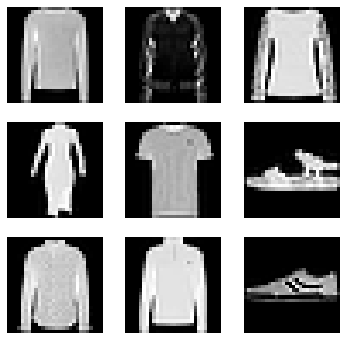

In [6]:
gen.visualize_subplot(
    full_X_train[random_sample],
    [""] * len(random_sample), 
    (3, 3), (6, 6)
)

In [7]:
full_X_train = full_X_train / 255.
X_test = X_test / 255.

In [8]:
full_noise_X_train = np.zeros_like(full_X_train)

for idx, img in enumerate(full_X_train):
    full_noise_X_train[idx] = util.random_noise(
        img, mode="gaussian", seed=1234
    )

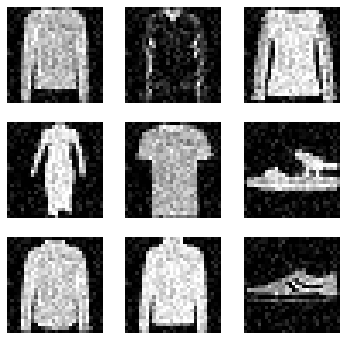

In [9]:
gen.visualize_subplot(
    full_noise_X_train[random_sample],
    [""] * len(random_sample), 
    (3, 3), (6, 6)
)

In [10]:
noise_X_train, noise_X_val, X_train, X_val = train_test_split(
    full_noise_X_train, full_X_train, test_size=0.2, random_state=1234
)

In [11]:
noise_X_test = np.zeros_like(X_test)

for idx, img in enumerate(X_test):
    noise_X_test[idx] = util.random_noise(
        img, mode="gaussian", seed=1234
    )

In [12]:
np.random.seed(0)
random_sample = np.random.choice(len(X_test), size=9)

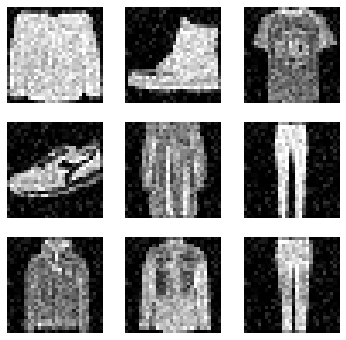

In [13]:
gen.visualize_subplot(
    noise_X_test[random_sample],
    [""] * len(random_sample), 
    (3, 3), (6, 6)
)

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="selu"),
    keras.layers.Dense(32, activation="selu"),
    keras.layers.Dense(16, activation="selu"),
    keras.layers.Dense(32, activation="selu"),
    keras.layers.Dense(64, activation="selu"),
    keras.layers.Dense(np.multiply(*full_X_train.shape[1:])),
    keras.layers.Reshape(full_X_train.shape[1:])
])

In [15]:
model_kwargs = {
    "loss": keras.losses.MeanSquaredError(),
    "optimizer": "adam"
}

In [16]:
model.compile(**model_kwargs)

In [17]:
train_args = (noise_X_train, X_train)

train_kwargs = {
    "batch_size": 64,
    "validation_data": (noise_X_val, X_val),
    "epochs": 10
}

history = model.fit(*train_args, **train_kwargs)

Epoch 1/10
750/750 [==============================] - 4s 4ms/step - loss: 0.0335 - val_loss: 0.0236
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0222 - val_loss: 0.0214
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0207 - val_loss: 0.0202
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0197 - val_loss: 0.0193
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0190 - val_loss: 0.0187
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0184 - val_loss: 0.0183
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0180 - val_loss: 0.0178
Epoch 8/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0177 - val_loss: 0.0175
Epoch 9/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0174 - val_loss: 0.0174
Epoch 10/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0172 - val_loss: 0.0172

In [ ]:
denoised_X_test = model.predict(noise_X_test)

In [ ]:
mean_absolute_error(denoised_X_test.flatten(), X_test.flatten())

0.08446558842854497

In [ ]:
mean_squared_error(denoised_X_test.flatten(), X_test.flatten())

0.01740387219701592

In [ ]:
r2_score(denoised_X_test.flatten(), X_test.flatten())

0.8344039220845854

In [ ]:
np.random.seed(0)
random_sample = np.random.choice(len(X_test), size=9)

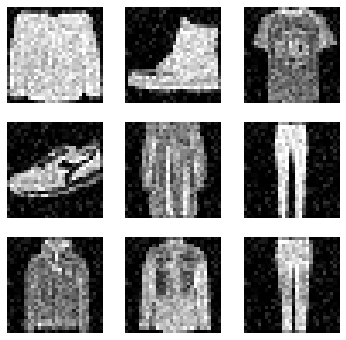

In [ ]:
gen.visualize_subplot(
    noise_X_test[random_sample],
    [""] * len(random_sample), 
    (3, 3), (6, 6)
)

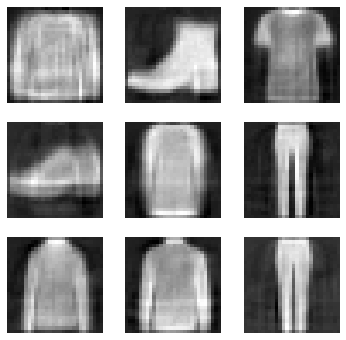

In [ ]:
gen.visualize_subplot(
    denoised_X_test[random_sample],
    [""] * len(random_sample), 
    (3, 3), (6, 6)
)